## Introduction

This data comes from FiveThirtyEight using their RAPTOR Metric. No, this isn't just for the Toronto Raptors. It's a metric they created to better reflects the style of the modern NBA and the performance of its players. It standard for Robust Algorithm (using) Player Tracking (and) On/Off Ratings. It also has WAR (Wins Above Replacement Data). That's more up my ally as a baseball fan.
\
\
Full Info:
\
https://fivethirtyeight.com/features/introducing-raptor-our-new-metric-for-the-modern-nba/

## Questions
- Who is the best player since 1974 (when the data starts)?
- What is the best single season of all time (defensive, offensive, total)
- What young player is on the path to be one of the all-time greats?

## 1.0 Imports

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2.0 Load Data

In [149]:
nba = pd.read_csv('nba-raptor/historical_RAPTOR_by_player.csv')

In [150]:
nba.head()

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,-3.905732,-1.696796,-5.602528,0.199241
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,-2.499576,-0.721876,-3.221452,0.485436
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,-2.328144,-2.002263,-4.330407,0.488266
3,Alaa Abdelnaby,abdelal01,1994,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,-5.820936,-3.526560,-9.347496,0.511152
4,Alaa Abdelnaby,abdelal01,1995,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,-3.715429,-1.027024,-4.742453,1.545922


In [151]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19159 entries, 0 to 19158
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_name       19159 non-null  object 
 1   player_id         19159 non-null  object 
 2   season            19159 non-null  int64  
 3   poss              19159 non-null  int64  
 4   mp                19159 non-null  int64  
 5   raptor_offense    19159 non-null  float64
 6   raptor_defense    19159 non-null  float64
 7   raptor_total      19159 non-null  float64
 8   war_total         19159 non-null  float64
 9   war_reg_season    19159 non-null  float64
 10  war_playoffs      19159 non-null  float64
 11  predator_offense  19159 non-null  float64
 12  predator_defense  19159 non-null  float64
 13  predator_total    19159 non-null  float64
 14  pace_impact       19158 non-null  float64
dtypes: float64(10), int64(3), object(2)
memory usage: 2.2+ MB


In [152]:
nba.describe()

,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
count,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19159.000000,19158.000000
mean,2001.911686,2753.459836,1363.018477,-1.282572,-0.336641,-1.619213,1.980890,1.791916,0.188974,-1.285501,-0.533616,-1.819117,0.196519
std,12.991213,2032.700765,1003.793897,3.502971,2.467030,4.525422,3.458863,3.074403,0.589576,3.218998,2.305877,4.435724,0.827142
min,1977.000000,1.000000,0.000000,-82.192072,-56.982520,-103.084801,-7.382978,-7.382978,-1.376520,-71.510086,-37.871745,-101.442650,-7.191955
25%,1991.000000,883.000000,440.000000,-2.828729,-1.412329,-3.574572,-0.114100,-0.114928,0.000000,-2.860883,-1.631094,-3.989563,-0.241770
50%,2003.000000,2549.000000,1262.000000,-1.112462,-0.406899,-1.365128,0.586046,0.556030,0.000000,-1.191378,-0.532853,-1.628693,0.093278
75%,2013.000000,4345.500000,2144.500000,0.547465,0.707465,0.747604,3.106047,2.901287,0.072959,0.468142,0.628289,0.691144,0.517431
max,2022.000000,9271.000000,4270.000000,53.228864,62.469205,72.622361,28.762877,24.355978,7.006934,42.890281,42.989063,49.106166,23.732063


## 3.0 Visualize

### 3.1 Who is the best player since 1974?

Using both RAPTOR and WAR, let's explore who is the GOAT (since 1974 lol).

In [153]:
#Create a goupby dataframe, summing up career WAR and RAPTOR.
car_totals = nba.groupby('player_name')[['raptor_offense','raptor_defense','raptor_total','war_total','war_reg_season','war_playoffs']].agg([np.sum])

#create a groupby dataframe, counting unique seasons
sea_count = pd.DataFrame(nba.groupby('player_name')[['season']].nunique())

#merge dataframes
#group_nba = pd.merge(car_totals, sea_count, on='player_name', how='inner', suffixes=('_x', '_y'))

nba_group = car_totals.join(pd.concat([sea_count], axis=1, keys=['seasons']))

In [154]:
nba_group = nba_group.droplevel(1, axis=1)

In [155]:
nba_group.head()

,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,seasons
player_name,,,,,,,
A.C. Green,-4.705119,3.341092,-1.364027,60.159018,53.723918,6.435101,16
A.J. Bramlett,-8.360250,-1.460235,-9.820485,-0.221281,-0.221281,0.000000,1
A.J. English,-3.671165,-5.108166,-8.779331,-2.597820,-2.597820,0.000000,2
A.J. Guyton,-12.421668,-4.302077,-16.723745,-0.232653,-0.232653,0.000000,3
A.J. Wynder,-5.176970,-3.230910,-8.407881,-0.111936,-0.111936,0.000000,1


In [156]:
#save top 10 war and raport
war_10 = nba_group.sort_values(by='war_total', ascending=False).head(10).reset_index(drop=False)
raptor_10 = nba_group.sort_values(by='raptor_total', ascending=False).head(10).reset_index(drop=False)

In [157]:
raptor_10

,player_name,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,seasons
0,John Stockton,116.554814,32.612752,149.167565,302.582037,268.114358,34.467679,19
1,LeBron James,118.910097,19.421459,138.331556,330.300614,263.000086,67.300529,19
2,Chris Paul,110.089072,21.222283,131.311356,246.010019,218.624743,27.385275,17
3,Michael Jordan,86.743440,31.115867,117.859307,280.362177,232.680810,47.681367,15
4,David Robinson,26.238601,70.045005,96.283606,194.286908,174.714298,19.572610,14
5,Tim Duncan,24.833909,71.421209,96.255118,229.963657,188.762095,41.201562,19
6,Magic Johnson,85.865812,10.011557,95.877369,216.450374,173.275305,43.175069,13
7,Kevin Garnett,23.608922,68.621065,92.229988,216.866618,196.652307,20.214312,21
8,Manu Ginobili,62.179984,29.347662,91.527646,151.868894,122.523334,29.345561,16
9,Charles Barkley,76.418684,14.262592,90.681276,199.092359,175.253412,23.838946,16


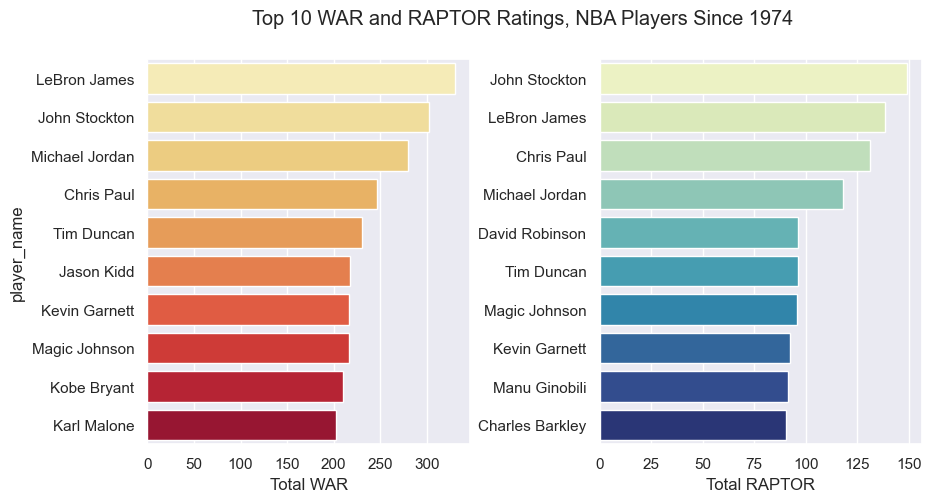

In [158]:
#visualize top 10 raptor and war
fig, ax = plt.subplots(1,2, sharey=False)


fig.set_size_inches(10, 5, forward=True)# set graph size

sns.barplot(ax=ax[0], x='war_total', y='player_name', data=war_10, palette='YlOrRd')
sns.barplot(ax=ax[1], x='raptor_total', y='player_name', data=raptor_10, palette='YlGnBu')

ax[1].set_ylabel('') #remove repetitive y_label on second graph
ax[0].set_xlabel('Total WAR')
ax[1].set_xlabel('Total RAPTOR')

fig.suptitle('Top 10 WAR and RAPTOR Ratings, NBA Players Since 1974') #set overall title
plt.subplots_adjust(wspace=0.4) #create space for labels between graphs
plt.show()

**Observations:**
\
Some interesting results here. The standard debate is MJ vs. Lebron. But the RAPTOR model really tries to reflect the style of <u>today's</u> NBA. There is also the factor that these players didn't all play the same number of years. Ignoring the value of longevity, let's see who is tops in metrics per season.

In [159]:
#Calculate metrics per season for this same subset of players
war_10['per_season'] = war_10['war_total'] / war_10['seasons']
raptor_10['per_season'] = raptor_10['raptor_total'] / raptor_10['seasons']

In [160]:
raptor_10.head(3)

,player_name,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,seasons,per_season
0,John Stockton,116.554814,32.612752,149.167565,302.582037,268.114358,34.467679,19,7.850924
1,LeBron James,118.910097,19.421459,138.331556,330.300614,263.000086,67.300529,19,7.280608
2,Chris Paul,110.089072,21.222283,131.311356,246.010019,218.624743,27.385275,17,7.724197


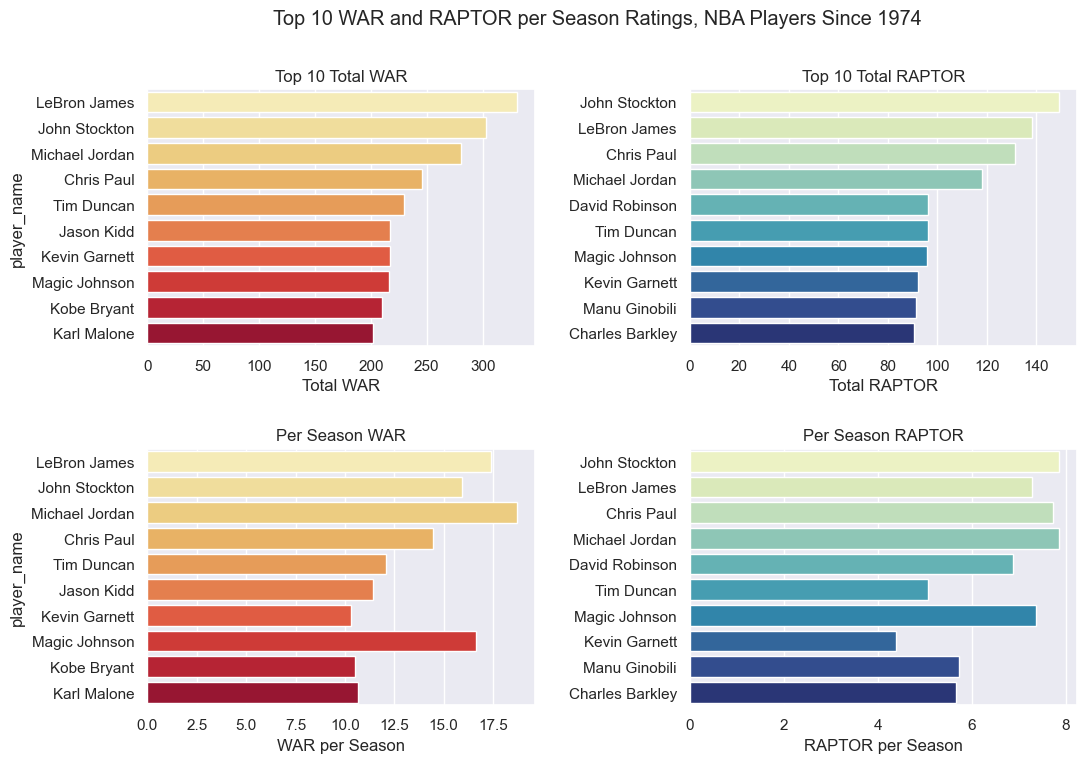

In [161]:
#visualize top 10 raptor and war
fig, ax = plt.subplots(2,2, sharey=False)


fig.set_size_inches(12, 8, forward=True)# set graph size

sns.barplot(ax=ax[0,0], x='war_total', y='player_name', data=war_10, palette='YlOrRd')
sns.barplot(ax=ax[0,1], x='raptor_total', y='player_name', data=raptor_10, palette='YlGnBu')
sns.barplot(ax=ax[1,0], x='per_season', y='player_name', data=war_10, palette='YlOrRd')
sns.barplot(ax=ax[1,1], x='per_season', y='player_name', data=raptor_10, palette='YlGnBu')

ax[0,1].set_ylabel('') #remove repetitive y_label on second graph
ax[1,1].set_ylabel('') #remove repetitive y_label on second graph
ax[0,0].set_xlabel('Total WAR')
ax[0,1].set_xlabel('Total RAPTOR')
ax[1,0].set_xlabel('WAR per Season')
ax[1,1].set_xlabel('RAPTOR per Season')
ax[0,0].set_title('Top 10 Total WAR')
ax[0,1].set_title('Top 10 Total RAPTOR')
ax[1,0].set_title('Per Season WAR')
ax[1,1].set_title('Per Season RAPTOR')

fig.suptitle('Top 10 WAR and RAPTOR per Season Ratings, NBA Players Since 1974') #set overall title
plt.subplots_adjust(wspace=0.4, hspace=0.4) #create space for labels between graphs
plt.show()

That now puts MJ at the top of both if we go on a per season basis. Let's now look at all the players offenseive and defensive raptor, highlighting the top 10 total. We'll use RAPTOR because it's a fun alternative stat and I like 538.

### 3.1.1 All Players

We'll start by add the per-season calculation and flagging the top 10 in the df.

In [162]:
nba_group.head(3)

,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,seasons
player_name,,,,,,,
A.C. Green,-4.705119,3.341092,-1.364027,60.159018,53.723918,6.435101,16
A.J. Bramlett,-8.360250,-1.460235,-9.820485,-0.221281,-0.221281,0.000000,1
A.J. English,-3.671165,-5.108166,-8.779331,-2.597820,-2.597820,0.000000,2


In [163]:
#create a per season amount
nba_group['raptor_per_season'] = nba_group['raptor_total'] / nba_group['seasons']

In [164]:
#create a ranking column and top 10 flag
nba_group['raptor_rank'] = nba_group['raptor_total'].rank(ascending=False)

#flag the top-10
nba_group['raptor_top_10'] = nba_group['raptor_rank'] <= 10

In [165]:
nba_group.sort_values(by='raptor_total',ascending=False).head(12)

,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,seasons,raptor_per_season,raptor_rank,raptor_top_10
player_name,,,,,,,,,,
John Stockton,116.554814,32.612752,149.167565,302.582037,268.114358,34.467679,19,7.850924,1.0,True
LeBron James,118.910097,19.421459,138.331556,330.300614,263.000086,67.300529,19,7.280608,2.0,True
Chris Paul,110.089072,21.222283,131.311356,246.010019,218.624743,27.385275,17,7.724197,3.0,True
Michael Jordan,86.743440,31.115867,117.859307,280.362177,232.680810,47.681367,15,7.857287,4.0,True
David Robinson,26.238601,70.045005,96.283606,194.286908,174.714298,19.572610,14,6.877400,5.0,True
Tim Duncan,24.833909,71.421209,96.255118,229.963657,188.762095,41.201562,19,5.066059,6.0,True
Magic Johnson,85.865812,10.011557,95.877369,216.450374,173.275305,43.175069,13,7.375182,7.0,True
Kevin Garnett,23.608922,68.621065,92.229988,216.866618,196.652307,20.214312,21,4.391904,8.0,True
Manu Ginobili,62.179984,29.347662,91.527646,151.868894,122.523334,29.345561,16,5.720478,9.0,True


In [166]:
sns.set()

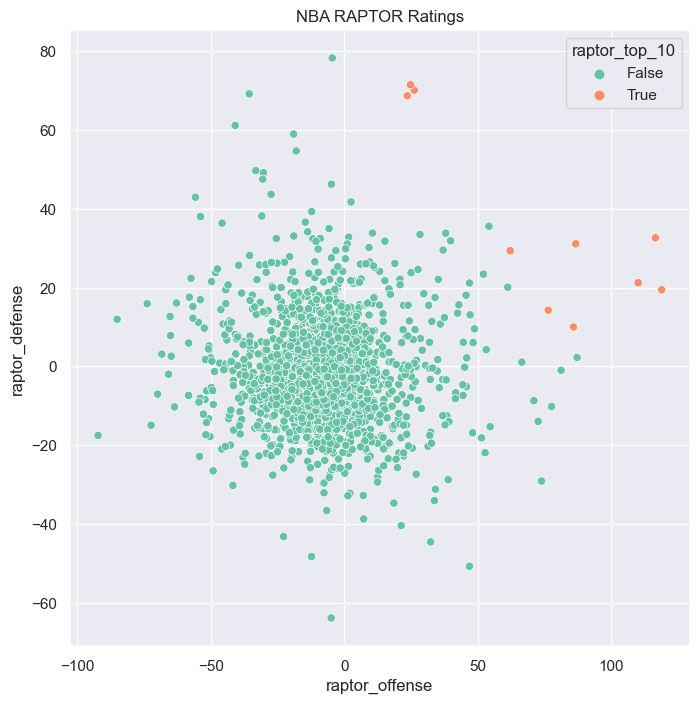

In [185]:
#Create a scatter plot
plt.figure(figsize=(8,8))

sns.scatterplot(x='raptor_offense', y='raptor_defense', data=nba_group, hue='raptor_top_10', palette='Set2')
plt.title('NBA RAPTOR Ratings')
plt.show()

There are more in the top 10 that are outliers in terms of better total offense, but there are 3 that are clustered based on their defensive scores. Looking at our dataframe, those are David Robinson, Kevin Garnett, and Tim Duncan - 3 big men that were great on both ends of the floor but their RAPTOR value is coming more from their defense.